## Author: Devendra Nagpure
## Roll Number: ME22D034

![qu.1](Screenshot%202025-03-08%20173927.png)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Given parameters
E = 200000  # Young's modulus (MPa)
a = 10 # 10 mm in meters
h = 2 * a  # Beam height
I = (1/12) * (a) * (h**3)  # Moment of inertia for rectangular cross-section
c = h / 2  # Distance to outer fiber

# Voce Hardening Parameters
sigma_0 = E / 500  # Initial yield stress
sigma_u = 1.5 * sigma_0  # Ultimate stress
s0 = 0.1  # Voce hardening parameter

# Compute Yield Moment My
My = sigma_0 * I / c

# Moment input
M_norm= 1.4
M_val = M_norm*My
M = np.linspace(0,M_val,1000)
# y position 
y_position= np.linspace(-c,c,100)

# normalized radius of curvature
rho_norm= np.zeros(len(M))

del_eps_p= np.zeros(len(y_position))
del_eps= np.zeros(len(y_position))


# Storage arrays
stress = np.zeros(len(y_position))
plastic_strain = np.zeros(len(y_position))
yield_strength = np.zeros(len(y_position))
s= np.zeros(len(y_position)) # plastic arc length

yield_strength = sigma_0 + (sigma_u-sigma_0)*(1-np.exp(-s/s0))
H= (sigma_u-sigma_0)*np.exp(-s/s0)

![Qu 1.1](Screenshot%202025-03-08%20164855.png)

In [28]:
for i in range(1,len(M)):

    del_M= M[i]-M[i-1]
    # Calculation of initial del_rho (initial curvature)
    del_rho_0= (del_M/(E*I)) - (1/I)*a*np.trapz(y_position*del_eps_p,y_position)

    # Calculation of next del_rho of the moment increment (+1 curvature)

    for j in range(len(y_position)):
        del_eps[j]= -y_position[j]*del_rho_0
        stress_trail= stress[j]+ E*del_eps[j]

        yield_fun= abs(stress_trail) - yield_strength[j]
        
        if yield_fun>0:
        
            d_lambda_0=  0 # yield_fun/(E+H[j])

            # Define the function
            def equation(d_lambda):
                eq= yield_fun - E*d_lambda- (
                    sigma_0 + (sigma_u-sigma_0)*(1-np.exp(-(s[j]+d_lambda)/s0))- yield_strength[j])
                return eq
            # Solve using Newton-Raphson method
            soln = newton(equation, d_lambda_0)
            d_lambda= soln


        else:
            d_lambda= 0

                
        del_eps_p[j]= d_lambda*np.sign(stress[j])
        d_s= d_lambda
        s[j]= s[j]+ d_s
        yield_strength[j]= sigma_0 + (sigma_u-sigma_0)*(1-np.exp(-s[j]/s0))
        H[j]= (sigma_u-sigma_0)*np.exp(-s[j]/s0)
        
        # Update state variable
        stress[j] =  stress[j]+ E*(del_eps[j] - del_eps_p[j])
        plastic_strain[j] = plastic_strain[j]+del_eps_p[j]

    del_rho=(del_M/(E*I)) - (1/I)*a*np.trapz(y_position*del_eps_p,y_position)



    while abs(del_rho-del_rho_0)> 0.0001:
        del_rho_0= del_rho

        for j in range(len(y_position)):
            del_eps[j]= -y_position[j]*del_rho_0
            stress_trail= stress[j]+ E*del_eps[j]

            yield_fun= abs(stress_trail) - yield_strength[j]
            
            if yield_fun>0:
                d_lambda_0=  0 # yield_fun/(E+H[j])

                # Define the function
                def equation(d_lambda):
                    eq= yield_fun - E*d_lambda- (sigma_0 + (sigma_u-sigma_0)*(1-np.exp(-(s[j]+d_lambda)/s0))- yield_strength[j])
                    return eq
                # Solve using Newton-Raphson method
                soln = newton(equation, d_lambda_0)
                d_lambda= soln

            else:
                d_lambda= 0

                    
            del_eps_p[j]= d_lambda*np.sign(stress[j])
            d_s= d_lambda
            s[j]= s[j]+ d_s
            yield_strength[j]= sigma_0 + (sigma_u-sigma_0)*(1-np.exp(-s[j]/s0))
            H[j]= (sigma_u-sigma_0)*np.exp(-s[j]/s0)

            # Update state variable
            stress[j] = stress[j]+ E*(del_eps[j] - del_eps_p[j])
            plastic_strain[j] = plastic_strain[j]+del_eps_p[j]

        del_rho=(del_M/(E*I)) - (1/I)*a*np.trapz(y_position*del_eps_p,y_position)
        
    
    # Update normalized curvature
    rho_norm[i]= rho_norm[i-1]+ a*del_rho
    

 



# Plot for Normalized Moment = 1.4

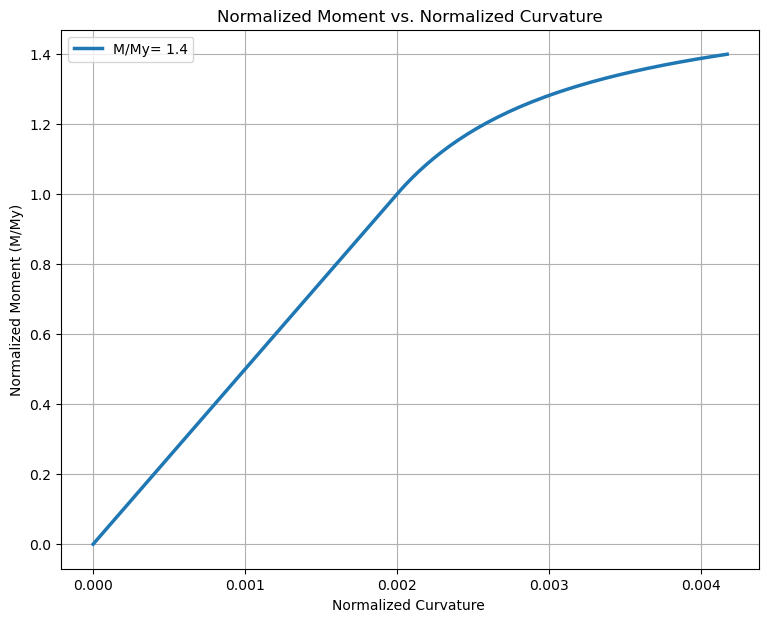

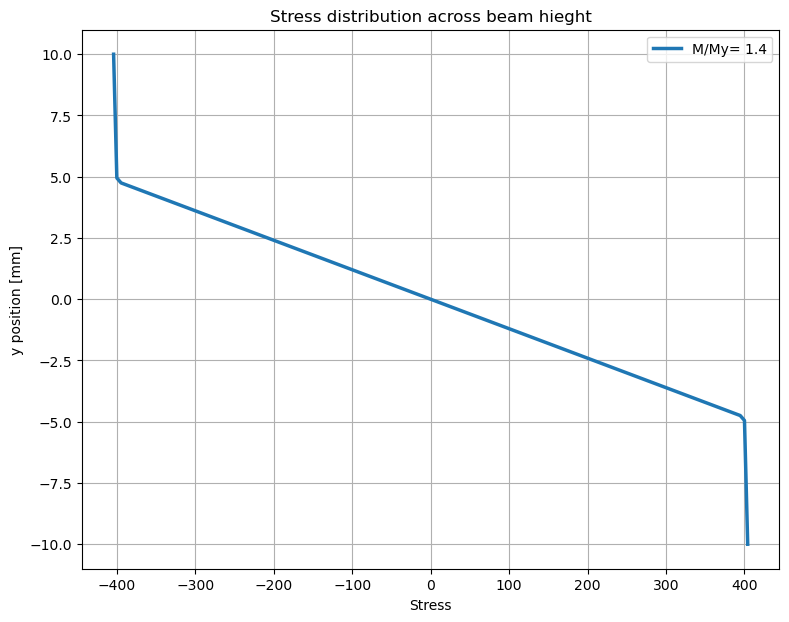

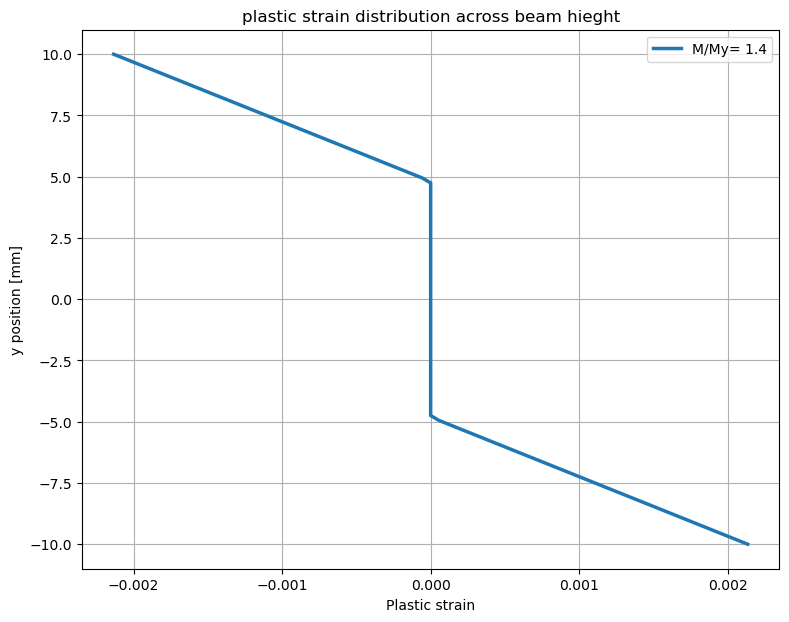

In [29]:
label_name=  "M/My= 1.4"


# Plot 1: Normalized Moment vs. Normalized Curvature
plt.figure(figsize=(9,7))
plt.plot(rho_norm, (M/My), linestyle='-', linewidth= 2.5, label= label_name)
plt.xlabel("Normalized Curvature ")
plt.ylabel("Normalized Moment (M/My)")
plt.title("Normalized Moment vs. Normalized Curvature")
plt.grid(True)
plt.legend()
plt.savefig('plot_1.png')
plt.show()      

# Plot 2: Stress distribution across beam hieght
plt.figure(figsize=(9,7))
plt.plot(stress, y_position, linestyle='-', linewidth= 2.5, label= label_name)
plt.xlabel("Stress")
plt.ylabel("y position [mm]")
plt.title("Stress distribution across beam hieght")
plt.grid(True)
plt.legend()
plt.savefig('plot_2.png')
plt.show() 

# Plot 3: plastic strain distribution across beam hieght
plt.figure(figsize=(9,7))
plt.plot(plastic_strain, y_position, linestyle='-', linewidth= 2.5, label=label_name )
plt.xlabel("Plastic strain")
plt.ylabel("y position [mm]")
plt.title("plastic strain distribution across beam hieght")
plt.grid(True)
plt.legend()
plt.savefig('plot_3.png')
plt.show()

    